In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD
amazon_ratings = pd.read_csv('C:/Users/gsyas/OneDrive/Desktop/customer_ratings_data.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,User Id,Product Id,Rating,Time stamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200


In [11]:
amazon_ratings.shape

(1048575, 4)

In [12]:
amazon_ratings

,User Id,Product Id,Rating,Time stamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200
...,...,...,...,...
1048570,A31P1LMEXJ8MML,B003H897AQ,1,1334448000
1048571,A6U8SW1MFX122,B003H897AQ,4,1361404800
1048572,A2ND0PP8HY7KBE,B003H897AQ,1,1372464000
1048573,AC9W044EAHP8P,B003H897AQ,1,1392768000


In [13]:
popular_products = pd.DataFrame(amazon_ratings.groupby('Product Id')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
Product Id,
B001MA0QY2,7533
B0009V1YR8,2869
B0000YUXI0,2143
B000ZMBSPE,2041
B003BQ6QXK,1918
B00121UVU0,1838
B000FS05VG,1589
B000142FVW,1558
B001JKTTVQ,1468


<Axes: xlabel='Product Id'>

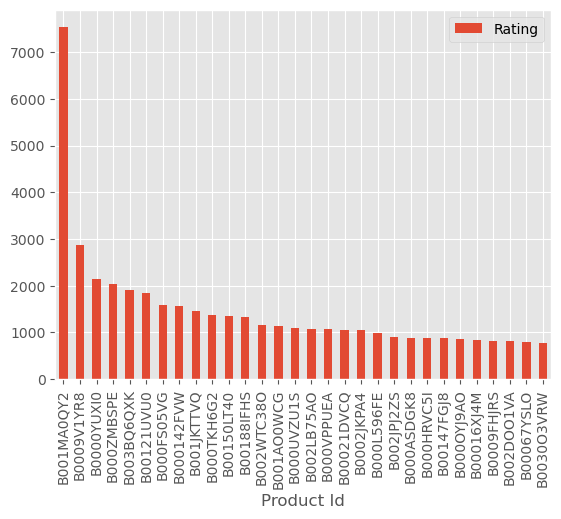

In [14]:
most_popular.head(30).plot(kind = "bar")

In [15]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='User Id', columns='Product Id', fill_value=0)
ratings_utility_matrix.head()

Product Id,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
User Id,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
ratings_utility_matrix.shape

(9697, 886)

In [17]:
X = ratings_utility_matrix.T
X.head()

User Id,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
Product Id,,,,,,,,,,,,,,,,,,,,,
1304139212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1304139220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130414089X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130414643X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1304146537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X.shape

(886, 9697)

In [25]:
X1 = X
#Decomposing the Matrix
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [20]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [21]:
X.index[99]

'6162071103'

In [22]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

96

In [24]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [26]:
###Recommending top 10 highly correlated products in sequence
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

[]

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
#Item to item based recommendation system based on product description
#Applicable when business is setting up its E-commerce website for the first time

In [29]:
product_descriptions = pd.read_csv('C:/Users/gsyas/OneDrive/Desktop/customer_ratings_data.csv')
product_descriptions.shape

(1048575, 4)